**Block 1: Load needed code for dataset**

In [240]:
import pandas as pd

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

y = diabetes.target



**Block #2: Importing libraries**

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [242]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [243]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [244]:
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


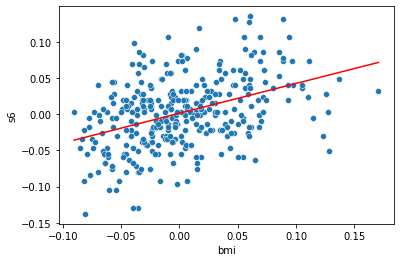

In [245]:
sns.scatterplot(x = Xtrain[Xtrain.columns[0]],y = ytrain)
sns.lineplot(Xtrain[Xtrain.columns[0]],model.predict(Xtrain),color='red')

**Block #3: Creating function, takes X and y as in the input, splits the X and y into train and test using train_test_split from sklearn, fits a linear regression model to the training X and training y data, recieve predicted y data for X test from the model and also print Output (at least) the model fit (i.e., R^2 score = coefficient of determination)**

In [246]:
def m_d(X,y):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)
  model = LinearRegression(fit_intercept=True)
  model.fit(Xtrain,ytrain)

  print('Training R^2: ',model.score(Xtrain,ytrain))
  print('Testing R^2: ',model.score(Xtest,ytest))
  print('y = ',np.round(model.coef_[0]),'* x +',np.round(model.intercept_))

  y_model = model.predict(Xtest)
  fig,axes = plt.subplots(Xtrain.shape[1],1,figsize=[9,10])

  if Xtest.shape[1] == 1:
    sns.scatterplot(x = Xtrain[Xtrain.columns[0]],y = ytrain,ax=axes)
    sns.lineplot(Xtrain[Xtrain.columns[0]],model.predict(Xtrain),color='black')
    return


**Block #4 and #5: Works Check and BMI**

Training R^2:  0.38880250430560737
Testing R^2:  0.17466209865339177
y =  1016.0 * x + 151.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


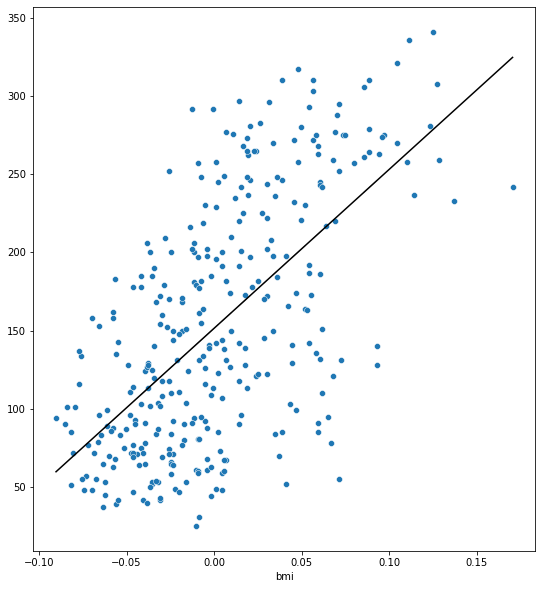

In [248]:
#the best single feature in X is BMI that best predicts y, second is s5
m_d(X[['bmi']],y)

**Block #6: object oriented programming that makes a figure that has two subplots**

In [253]:
def model_data_t(X,y):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)
  model = LinearRegression(fit_intercept=True)
  model.fit(Xtest,ytest)

  print('Testing R^2',model.score(Xtest,ytest))
  print('y = ',model.coef_[0],'*x + ',model.intercept_)

  y_model = model.predict(Xtest)
  fig,axes = plt.subplots(Xtest.shape[1],1,figsize=[9,10])

  x_model = model.predict(Xtrain)
  fig,axes = plt.subplots(Xtrain.shape[1],1,figsize=[9,10])


  if Xtest.shape[1] == 1:
    sns.scatterplot(x = Xtest[Xtest.columns[0]],y = Xtest,ax=axes)
    sns.lineplot(Xtest[Xtest.columns[0]],model.predict(Xtest),color='black')
    return

Testing R^2 0.29671438327534994
y =  900.098287064102 *x +  151.1755854668783


ValueError: ignored

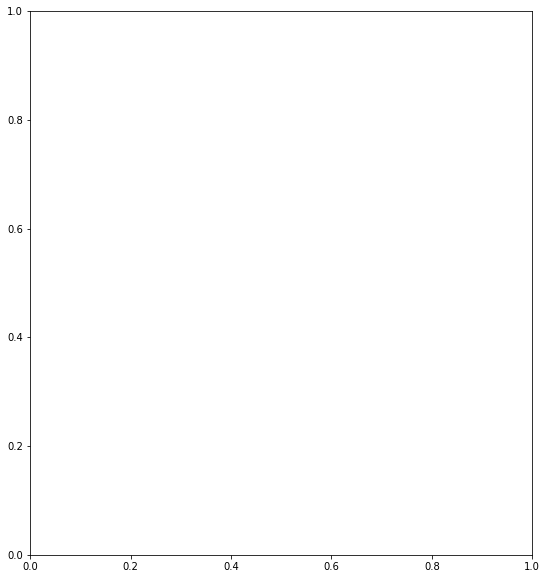

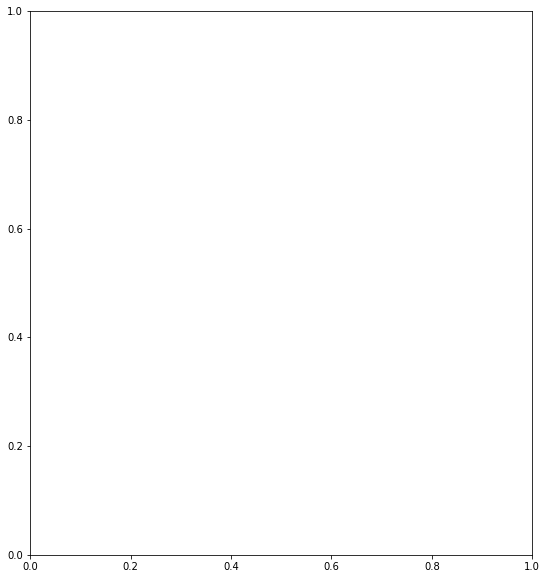

In [256]:
model_data_t(X[['s5']],y)